In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression, Ridge

#### Generating Regression Dataset
* n_features - number of features to be considered
* noise - deviation from straight line
* n_samples - number of samples

In [2]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)   
# Generate a random regression problem.
# noise: standard deviation of the gaussian noise

In [3]:
X[:5], Y[:5]

(array([[-0.34121107],
        [-0.63157618],
        [ 0.51674633],
        [ 0.60657466],
        [ 0.42167565]]),
 array([ -8.77553146, -12.54980112,   6.9858126 ,  -2.4003461 ,
          0.04550355]))

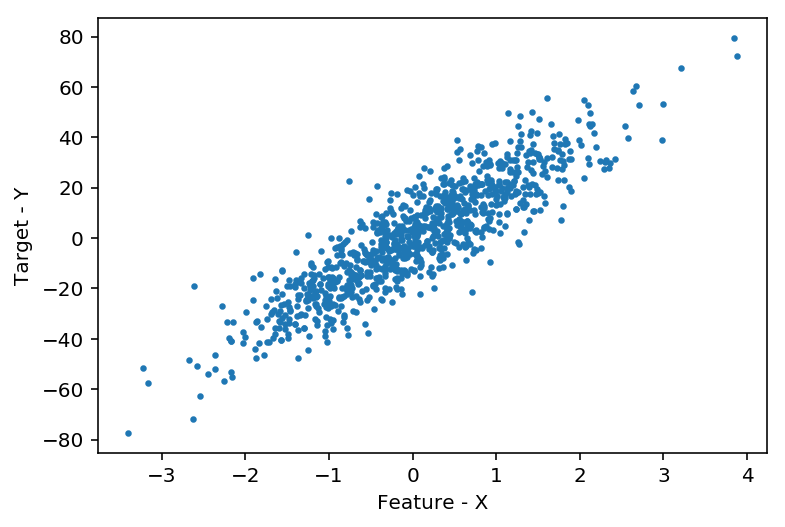

In [4]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

In [5]:
lr = LinearRegression()
lr.fit(X,Y)
lr.coef_, lr.intercept_

(array([18.64978255]), 0.027483679704602637)

### Predicting using trained model

In [6]:
pred = lr.predict(X)

* Blue dots represent maps to actual target data
* Orange dots represent predicted data 

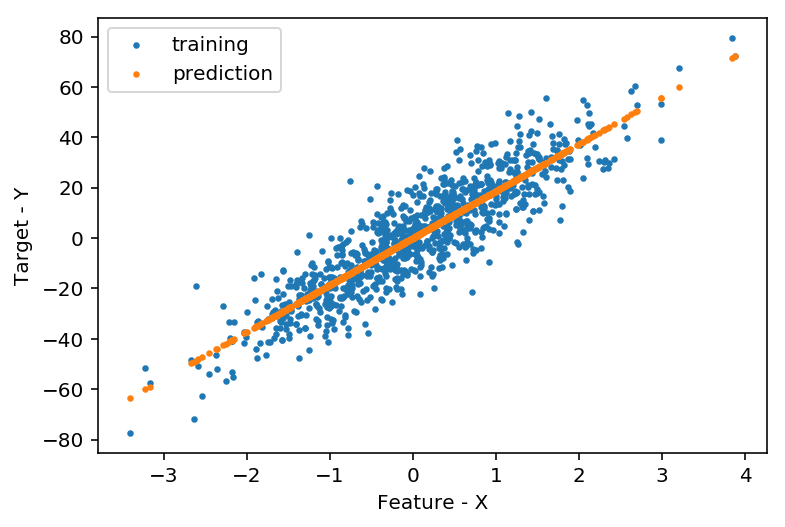

In [7]:
plt.scatter(X,Y,s=5, label='training')
plt.scatter(X,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

## 3. Regularized Regression Methods 
![](img/3.RegressionTechniques-01.jpg)

### Ridge Regression
* Ridge Regression imposes penalty on size of coef.
* Less impacted by outliers.

### (exercise) Adding outliers to data

In [29]:
# 연습
ridge = Ridge(alpha=.1)     # Regularization strength; Larger values specify stronger regularization. 
lr = LinearRegression()
ridge.fit([[0,0], [0,0], [1,1]],  [0, .1, 1])   # Fit Ridge regression model, (training data with its weight)
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lr.coef_, lr.intercept_

(array([0.475, 0.475]), 0.050000000000000044)

In [31]:
ridge.coef_, ridge.intercept_, 

(array([0.44186047, 0.44186047]), 0.07209302325581401)

### Back to the original problem

In [32]:
X.shape, Y.shape

((1000, 1), (1000,))

In [33]:
outliers = Y[950:] - 600; outliers

array([-610.59903222, -605.41541051, -633.93684848, -614.65215106,
       -592.56228809, -581.9832394 , -577.87609285, -591.7674651 ,
       -612.65752073, -602.51395831, -588.84312528, -570.13485465,
       -606.44341276, -603.18471582, -568.67324908, -627.92783797,
       -651.86395405, -604.44103903, -567.83465073, -588.23075335,
       -591.8374957 , -624.37635826, -588.65685233, -617.50946557,
       -589.38449058, -578.90425965, -582.43403463, -605.83554508,
       -614.85249031, -563.70977059, -611.68044806, -579.93008093,
       -547.27002917, -558.41847507, -578.39494245, -578.11953678,
       -609.79972461, -572.22409804, -639.43298529, -624.14777844,
       -607.94881141, -626.88455049, -597.77869379, -567.91761007,
       -580.99223451, -626.21260452, -580.96010625, -597.52342963,
       -573.59391195, -558.06831782])

In [34]:
import numpy as np
Y_Out = np.append(Y[:950],outliers)

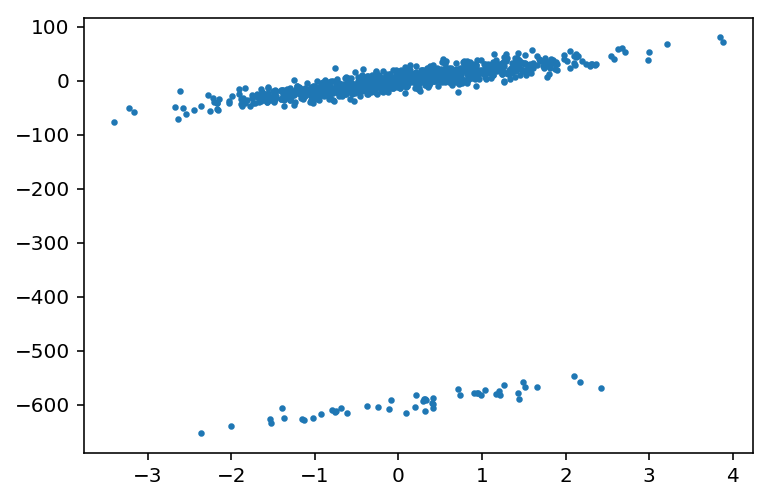

In [35]:
plt.scatter(X,Y_Out,s=5)

In [36]:
lr = LinearRegression()

lr.fit(X,Y_Out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
pred_Out = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

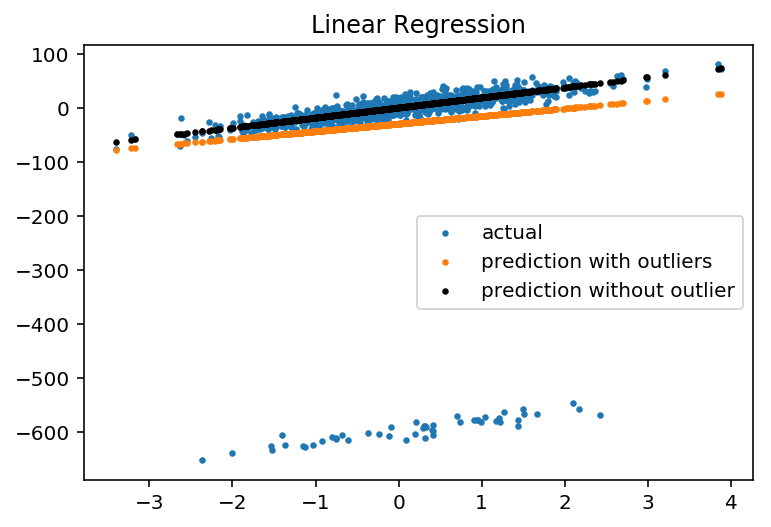

In [38]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5,label='prediction with outliers')
plt.scatter(X,pred,s=5,c='k', label='prediction without outlier')
plt.legend() # The elements to be added to the legend are automatically determined, 
             # when you do not pass in any extra arguments.
plt.title('Linear Regression')

In [39]:
lr.coef_, lr.intercept_

(array([14.08421493]), -29.79064900015244)

In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1000)
ridge.fit(X,Y_Out)
pred_ridge = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

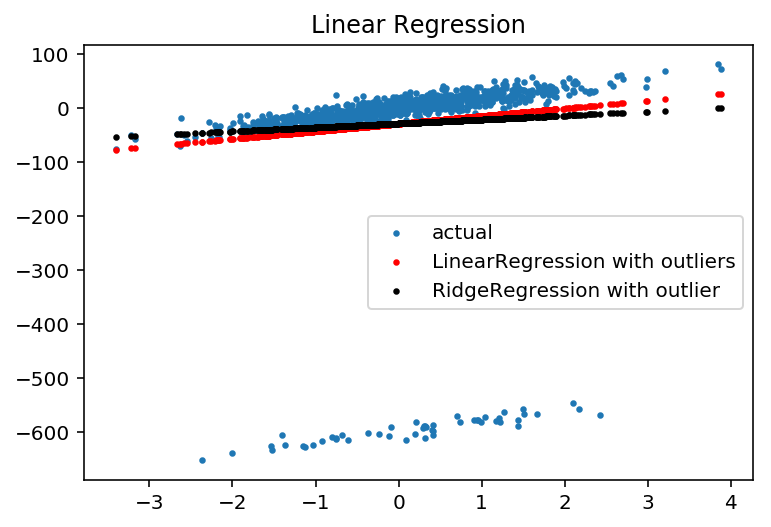

In [41]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(X,pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [43]:
ridge.coef_    # coefficient(w) 가 값이 훨씬 작아짐.

array([7.3133975])

### Effects of alpha using Ridge on Coeficients 
* Data generation

In [44]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)
# w: The coefficient of the underlying linear model. It is returned only if coef 
# is True.

In [45]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

### Training Ridge for different values of alpha
* Coefs calculated are appended to a list
* Generate 20 alphas from 10^-6 to 10^6

In [46]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [47]:
alphas[-20:]

array([  71494.28986598,   82143.43584919,   94378.78277775,
        108436.59686896,  124588.3364295 ,  143145.89375235,
        164467.61779947,  188965.23396912,  217111.79456945,
        249450.81352303,  286606.76169482,  329297.12550971,
        378346.26171319,  434701.3158125 ,  499450.51158551,
        573844.16483024,  659318.82713335,  757525.02587719,
        870359.13614851, 1000000.        ])

In [53]:
coefs = []
for a in alphas:
    # ridge = Ridge(alpha=a, fit_intercept=False) # fit_intercept=False sets,
                                                # the y-intercept to 0. 
                                                # if fit_intercept=True, 
                                                # the y-intercept will be determined 
                                                # by the line of best fit.
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

In [54]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

In [55]:
coefs[:5]

[array([77.9329301 , -5.38951142, 29.02064678, 16.88482804,  8.4848682 ,
        97.31045079,  8.27329314, -7.786585  , 73.97203495, 33.7866822 ]),
 array([77.9328879 , -5.38955388, 29.02063632, 16.88483654,  8.4848554 ,
        97.310398  ,  8.27329212, -7.78661826, 73.97201384, 33.78671655]),
 array([77.93283942, -5.38960269, 29.02062428, 16.88484632,  8.48484069,
        97.31033736,  8.27329095, -7.78665648, 73.97198957, 33.78675598]),
 array([77.93278372, -5.38965874, 29.02061047, 16.88485755,  8.48482379,
        97.31026768,  8.27328961, -7.78670039, 73.9719617 , 33.78680131]),
 array([77.93271972, -5.38972317, 29.02059458, 16.88487045,  8.48480438,
        97.31018763,  8.27328806, -7.78675085, 73.97192966, 33.78685337])]

In [56]:
coefs[-5:]   # w 값이 굉장이 작아짐을 볼 수 있다.

[array([ 0.00020351, -0.00027659,  0.00041702, -0.00015338,  0.00033218,
         0.00054698, -0.000161  , -0.00054558,  0.00044552,  0.00060086]),
 array([ 0.00017713, -0.00024073,  0.00036295, -0.0001335 ,  0.00028912,
         0.00047607, -0.00014013, -0.00047485,  0.00038776,  0.00052297]),
 array([ 0.00015417, -0.00020952,  0.0003159 , -0.00011619,  0.00025164,
         0.00041435, -0.00012196, -0.00041329,  0.00033749,  0.00045517]),
 array([ 0.00013418, -0.00018236,  0.00027495, -0.00010113,  0.00021902,
         0.00036064, -0.00010615, -0.00035971,  0.00029374,  0.00039616]),
 array([ 1.16785397e-04, -1.58719039e-04,  2.39303910e-04, -8.80183727e-05,
         1.90623998e-04,  3.13884830e-04, -9.23900663e-05, -3.13080338e-04,
         2.55659776e-04,  3.44803202e-04])]

#### Plotting alphas & coefs
* Different colors represents different coefs

#### Conclusion
* As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
* For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

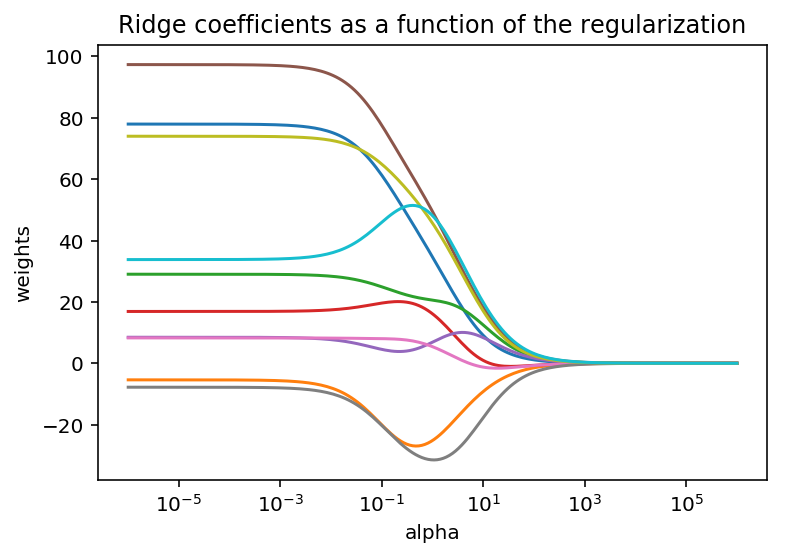

In [57]:
ax = plt.gca()
# Get the current Axes instance on the current figure matching the given keyword 
# args, or create one.

ax.plot(alphas, coefs)
ax.set_xscale('log')
# plt.plot(alphas, coefs)
# plt.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()